In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using Plots, Interact, LinearAlgebra, ForwardDiff
gr(size=(600,400))
contour(1:10, 1:10, atan)
nothing

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2302208843726120219\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8532807879466011749\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2302208843726120219\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

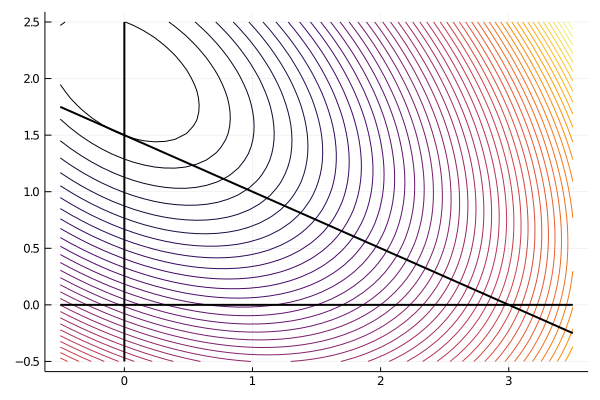

In [12]:
using Random
Random.seed!(0)
Q = rand(2, 2)
Q = Q * Q' + I
# c = -2 * Q * ones(2)
c = - Q * [0.0; 2.0]
A = [1.0 2.0]
b = [3.0]

# a₁ x₁ + a₂ x₂ = b
xg = range(-0.5, 3.5, length=50)
yg = range(-0.5, 2.5, length=50)
f(x) = 0.5 * dot(x, Q * x) + dot(c, x)
contour(xg, yg, (x,y) -> f([x;y]), leg=false, levels=50)
plot!(x -> (b[1] - A[1] * x) / A[2], xg[1], xg[end], c=:black, lw=2)
plot!(xg, 0 * yg, c=:black, lw=2)
plot!(0 * xg, yg, c=:black, lw=2)

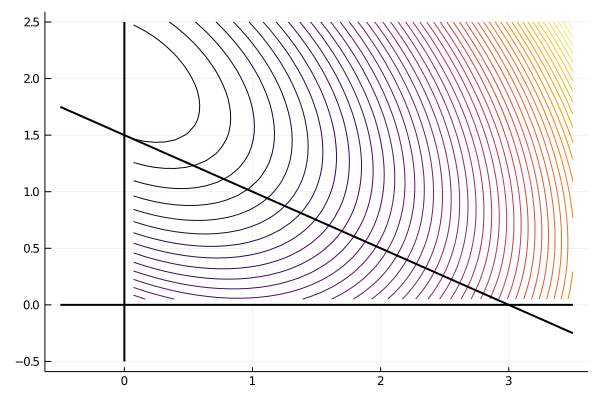

In [15]:
μ = 1e-8
xg = range(-0.5, 3.5, length=50)
yg = range(-0.5, 2.5, length=50)
fμ(x) = 0.5 * dot(x, Q * x) + dot(c, x) - μ * sum(log.(x))
contour(xg, yg, (x,y) -> x > 0 && y > 0 ? fμ([x;y]) : NaN, leg=false, levels=50)
plot!(x -> (b[1] - A[1] * x) / A[2], xg[1], xg[end], c=:black, lw=2)
plot!(xg, 0 * yg, c=:black, lw=2)
plot!(0 * xg, yg, c=:black, lw=2)

In [51]:
x = [2.0; 2.0]
y = [0.0]
μ = 1.0
xg = range(-0.5, 3.5, length=50)
yg = range(-0.5, 2.5, length=50)

-0.5:0.061224489795918366:2.5

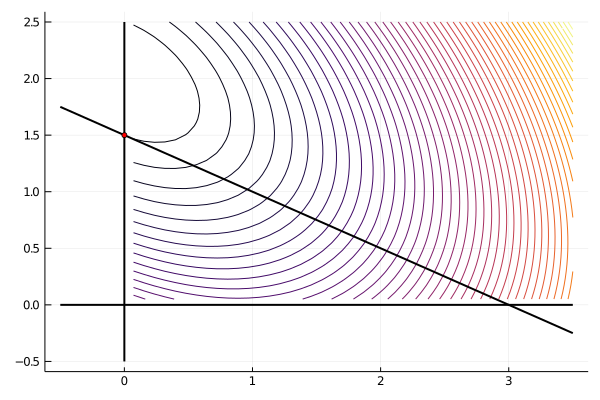

In [87]:
fμ(x) = 0.5 * dot(x, Q * x) + dot(c, x) - μ * sum(log.(x))
contour(xg, yg, (x,y) -> x > 0 && y > 0 ? fμ([x;y]) : NaN, leg=false, levels=50)
plot!(x -> (b[1] - A[1] * x) / A[2], xg[1], xg[end], c=:black, lw=2)
plot!(xg, 0 * yg, c=:black, lw=2)
plot!(0 * xg, yg, c=:black, lw=2)
scatter!([x[1]], [x[2]], c=:red, ms=3)

In [82]:
K = [Q + μ * diagm(0 => 1 ./ x.^2)  A'; A  0.0]
rhs = [Q * x + c - μ ./ x + A' * y; A * x - b]
norm(rhs)

0.841565968425042

In [83]:
Δxy = -K \ rhs
Δx = Δxy[1:2]
Δy = Δxy[3:3]
Δx, Δy

([9.992652503746727e-5, -4.9963262518733635e-5], [-0.0007159158664879911])

In [84]:
α = 1.0
while any(x + α * Δx .≤ 0)
    α *= 0.99
end
α

1.0

In [85]:
x += α * Δx
y += α * Δy
x, y

([0.00020885611979943678, 1.4998955719401001], [0.46509775143851617])

In [86]:
μ = μ / 10

1.0e-5